In [ ]:
# first importing libraries
import base64
import requests
import numpy as np
import gdown
from zipfile import ZipFile
import os

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import pandas as pd
from torchvision.io import read_image
import re
import cv2
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from torch.optim import lr_scheduler


from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

import time
import os
import copy
import string

from nltk.corpus import stopwords
import nltk
import itertools
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.2 MB/s eta 0:00:00


# Importing & Processing the Text & Loading the Model

In [ ]:
with open('/content/MSCTD/MSCTD_data/ende/english_train.txt') as tr:
    text_train = [line.rstrip('\n') for line in tr]

with open('/content/MSCTD/MSCTD_data/ende/english_dev.txt') as v:
    text_val = [line.rstrip('\n') for line in v]

with open('/content/MSCTD/MSCTD_data/ende/english_test.txt') as te:
    text_test = [line.rstrip('\n') for line in te]

In [ ]:
print(f'all possible punctuations = {string.punctuation}')
punc_remove = string.punctuation

all possible punctuations = !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
remove_translate = str.maketrans('', '', string.punctuation)

In [ ]:
train_pro = []
for txt in text_train:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  train_pro.append(text_final)



test_pro = []
for txt in text_test:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  test_pro.append(text_final)

  
val_pro = []
for txt in text_val:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  val_pro.append(text_final)

In [ ]:
print(text_train[2])
print(train_pro[2])

print(text_test[2])
print(test_pro[2])

print(text_val[2])
print(val_pro[2])

I'm sorry. I have to tell you something,
im sorry tell something
I'm not happy about it either, okay? At all.
im happy either okay
Your pain is dramatic to me.
pain dramatic


In [ ]:
from transformers import BertConfig, BertTokenizer,BertModel

labels = ["neutral","negative","positive"]
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')
MODEL_NAME_OR_PATH = 'distilbert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

label2id: {'neutral': 0, 'negative': 1, 'positive': 2}
id2label: {0: 'neutral', 1: 'negative', 2: 'positive'}


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


{
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dim": 768,
  "dropout": 0.1,
  "hidden_act": "gelu",
  "hidden_dim": 3072,
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neutral",
    "1": "negative",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 1,
    "neutral": 0,
    "positive": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "n_heads": 12,
  "n_layers": 6,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
from torch import nn
class Sentiment_Bert_classifier(nn.Module):

    def __init__(self, config,MODEL_NAME_OR_PATH,fine_tune):
        super(Sentiment_Bert_classifier, self).__init__()

        bert_model = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
        if (fine_tune):
          self.bert = bert_model
        else:
          for param in bert_model.parameters():
            param.requires_grad = False
          self.bert = bert_model
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask, token_type_ids=token_type_ids,return_dict=False)
        
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits 

In [ ]:
pt_model = Sentiment_Bert_classifier(config=config,MODEL_NAME_OR_PATH = 'distilbert-base-uncased',fine_tune = True )
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertModel: ['distilbert.transformer.layer.0.attention.k_lin.bias', 'vocab_transform.bias', 'distilbert.embeddings.LayerNorm.bias', 'distilbert.transformer.layer.5.output_layer_norm.weight', 'distilbert.transformer.layer.1.ffn.lin1.weight', 'distilbert.transformer.layer.1.output_layer_norm.weight', 'distilbert.transformer.layer.5.output_layer_norm.bias', 'distilbert.transformer.layer.3.attention.k_lin.weight', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.1.output_layer_norm.bias', 'distilbert.transformer.layer.3.attention.q_lin.bias', 'distilbert.transformer.layer.5.ffn.lin2.weight', 'distilbert.transformer.layer.1.sa_layer_norm.bias', 'distilbert.transformer.layer.1.attention.k_lin.weight', 'distilbert.tran

pt_model <class '__main__.Sentiment_Bert_classifier'>


In [ ]:
with open('/content/MSCTD/MSCTD_data/ende/sentiment_train.txt') as f:
  sentiment_train = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_dev.txt') as f:
  sentiment_dev = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_test.txt') as f:
  sentiment_test = [int(line.rstrip('\n')) for line in f]

In [ ]:
class sentiment_dataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for Taaghche. """

    def __init__(self, tokenizer, text ,labels, max_len=128):
        self.text = text
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        text= str(self.text[item])

       
        target = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')
        
        inputs = {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            
        }

       
        inputs['targets'] = torch.tensor(target, dtype=torch.long)
        
        return inputs

In [ ]:
from transformers import AutoConfig , AutoTokenizer , AutoModel
config = AutoConfig.from_pretrained('distilbert-base-uncased')

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

model = AutoModel.from_pretrained('distilbert-base-uncased')





tokenizer.tokenize(text_train[34])

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['she',
 'likes',
 'cooking',
 'italian',
 'because',
 'according',
 'to',
 'her',
 ',']

In [ ]:
X = text_train
len_max = 0;
for i in range(len(X)):
  x_temp = X[i].split()
  if len(x_temp)>len_max:
    len_max = len(x_temp)
print(f"maximum length = {len_max}")
# now tokenizing based of max length we find
encoding = tokenizer.encode_plus(
    X[32],
    max_length=len_max+2,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

maximum length = 19
Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[  101, 15624,  1012,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
Dataset_Train = sentiment_dataset(tokenizer=tokenizer,text = train_pro,labels = sentiment_train)

Dataset_Test = sentiment_dataset(tokenizer=tokenizer,text = test_pro,labels = sentiment_test)

Dataset_Val = sentiment_dataset(tokenizer=tokenizer,text = val_pro,labels = sentiment_dev)

In [ ]:
#Creating Batch
from torch.utils.data import DataLoader
train_data_loader= DataLoader(Dataset_Train,batch_size=16,shuffle = True)
test_data_loader= DataLoader(Dataset_Test,batch_size=16,shuffle = False)
valid_data_loader= DataLoader(Dataset_Val,batch_size=16,shuffle = False)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['text'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['targets'].shape)
print(sample_data['targets'][0])

dict_keys(['text', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
['getting crowded', 'dont see point youre taking unnecessary risks', 'talent show year graduated', 'oh wait minute wait minute wait minute', 'see future', 'security door thats gonna work', 'wish could', 'learn live crumbs', 'hey remember deal wanted make', 'dont', 'motion', 'look like sophie relieved', 'dont know', 'monkeys monkeys', 'mean trip says gonna win', 'oror least guy work uh']
torch.Size([16, 128])
tensor([  101,  2893, 10789,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     

In [ ]:
# sample data output

sample_data_comment = sample_data['text']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_targets = sample_data['targets']

# available for using in GPU
sample_data_input_ids = sample_data_input_ids.to(device)
sample_data_attention_mask = sample_data_attention_mask.to(device)
sample_data_token_type_ids = sample_data_token_type_ids.to(device)
sample_data_targets = sample_data_targets.to(device)


# outputs = F.softmax(
#     pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids), 
#     dim=1)

outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids)
_, preds = torch.max(outputs, dim=1)

print(outputs[:5, :])
print(preds[:5])

tensor([[-0.1673,  0.1894, -0.1325],
        [-0.1067,  0.1101, -0.4152],
        [-0.2341,  0.0041, -0.2569],
        [-0.1731,  0.0456, -0.5071],
        [-0.1170,  0.3579, -0.3671]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([1, 1, 1, 1, 1], device='cuda:0')


# Training Model with Processed Text

In [ ]:
def train_model_manual(model, criterion, optimizer,scheduler,val_beark,clip, num_epochs=25):
  """
  function for train our model! in this function we use dataloader directly.
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
      clip: for gradient clipping
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for dl in tqdm(train_data_loader, total=len(train_data_loader), desc="Training... "):
      # 1. Forward pass
      input_ids = dl['input_ids']
      attention_mask = dl['attention_mask']
      token_type_ids = dl['token_type_ids']
      targets = dl['targets']
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      token_type_ids = token_type_ids.to(device)
      targets = targets.to(device)
 
      outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, targets)
      acc_train += torch.sum(preds == targets.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()
      if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

      # 5. Optimizer step
      optimizer.step()
    loss_train = loss_train/counter
    acc_train = 100*acc_train/len(Dataset_Train)
    train_acc.append(acc_train)
    train_loss.append(loss_train)
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)
        outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
        _, preds = torch.max(outputs, 1)
        loss_test= criterion(outputs, targets.data)
        acc_test += torch.sum(preds == targets.data)
      loss_test = loss_test/counter
      acc_test = 100*acc_test/len(Dataset_Val)
      test_loss.append(loss_test)
      test_acc.append(acc_test)
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [ ]:
criterion = nn.CrossEntropyLoss()


optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

pt_model = pt_model.to(device)
pt_model_trained,best_loss,best_acc = train_model_manual(pt_model, criterion, optimizer_conv,exp_lr_scheduler,20,0.0,num_epochs=12)

Validating... : 100%|██████████| 317/317 [00:34<00:00,  9.07it/s]


Epoch: 0 | Loss: 1.10300, Acc: 38.19% | Test Loss: 0.96156, Test Acc: 38.93%


Validating... : 100%|██████████| 317/317 [00:34<00:00,  9.06it/s]


Epoch: 1 | Loss: 1.07109, Acc: 41.00% | Test Loss: 0.98151, Test Acc: 42.54%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.02it/s]


Epoch: 2 | Loss: 1.04873, Acc: 44.58% | Test Loss: 1.18883, Test Acc: 44.76%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.04it/s]


Epoch: 3 | Loss: 1.02378, Acc: 47.48% | Test Loss: 0.84635, Test Acc: 43.49%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.03it/s]


Epoch: 4 | Loss: 1.00335, Acc: 49.42% | Test Loss: 1.16149, Test Acc: 47.74%


Validating... : 100%|██████████| 317/317 [00:34<00:00,  9.08it/s]


Epoch: 5 | Loss: 0.98243, Acc: 51.45% | Test Loss: 0.87445, Test Acc: 42.52%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.03it/s]


Epoch: 6 | Loss: 0.95820, Acc: 53.91% | Test Loss: 1.28128, Test Acc: 47.74%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.04it/s]


Epoch: 7 | Loss: 0.93236, Acc: 55.79% | Test Loss: 1.38143, Test Acc: 47.84%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.03it/s]


Epoch: 8 | Loss: 0.91083, Acc: 57.85% | Test Loss: 0.89968, Test Acc: 48.05%


Validating... : 100%|██████████| 317/317 [00:35<00:00,  9.04it/s]


Epoch: 9 | Loss: 0.88006, Acc: 59.79% | Test Loss: 0.97211, Test Acc: 43.87%


Validating... : 100%|██████████| 317/317 [00:34<00:00,  9.07it/s]


Epoch: 10 | Loss: 0.85119, Acc: 61.77% | Test Loss: 0.97355, Test Acc: 48.21%


Validating... : 100%|██████████| 317/317 [00:34<00:00,  9.07it/s]


Epoch: 11 | Loss: 0.82060, Acc: 63.84% | Test Loss: 1.16667, Test Acc: 47.90%
Training complete in 83m 23s
Best val Acc: 48.212521


## Evaluatiing the Model with Pro Text

In [ ]:
pt_model_trained.eval()
targets_train = []
targets_predicted = []
with torch.inference_mode():
  for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
  # 1. Forward pass
    input_ids = dl['input_ids']
    attention_mask = dl['attention_mask']
    token_type_ids = dl['token_type_ids']
    targets = dl['targets']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    targets = targets.to(device)
    outputs = pt_model_trained(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().detach().numpy()
    targets = targets.cpu().detach().numpy()
    targets_predicted.append(preds)
    targets_train.append(targets)



Validating... : 100%|██████████| 317/317 [00:35<00:00,  8.90it/s]


In [ ]:
#targets_train = np.concatenate(targets_train,axis = 0)
targets_predicted = np.concatenate(targets_predicted,axis = 0)
targets_train = np.concatenate(targets_train,axis = 0)

In [ ]:
print(np.shape(targets_predicted))
print(np.shape(targets_train))

(5063,)
(5063,)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn import metrics

accuracy score on validation data: 0.48212522220027654
f1 score on validation data: 0.46086372692056693
precision score on validation data: 0.4981110306301781
recall score on validation data: 0.4698018645681608


Text(0.5, 1.0, 'confusion matrix for val data')

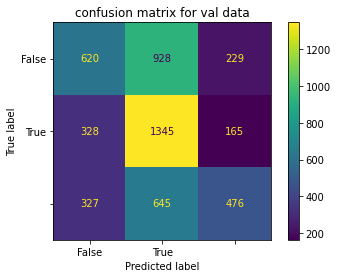

In [ ]:
acc_test = accuracy_score(targets_train,targets_predicted)
f1_test = f1_score(targets_train, targets_predicted, average="macro")
pre_test = precision_score(targets_train, targets_predicted, average="macro")
recall_test = recall_score(targets_train, targets_predicted, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(targets_train, targets_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for val data')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
torch.save(pt_model_trained.state_dict(), '/content/gdrive/MyDrive/pt_model_trained_with_pro_text.pth')

# Training Model with Normal Text

In [ ]:
Dataset_Train = sentiment_dataset(tokenizer=tokenizer,text = text_train,labels = sentiment_train)

Dataset_Test = sentiment_dataset(tokenizer=tokenizer,text = text_test,labels = sentiment_test)

Dataset_Val = sentiment_dataset(tokenizer=tokenizer,text = text_val,labels = sentiment_dev)

In [ ]:
#Creating Batch
from torch.utils.data import DataLoader
train_data_loader= DataLoader(Dataset_Train,batch_size=16,shuffle = True)
test_data_loader= DataLoader(Dataset_Test,batch_size=16,shuffle = False)
valid_data_loader= DataLoader(Dataset_Val,batch_size=16,shuffle = False)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['text'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['targets'].shape)
print(sample_data['targets'][0])

dict_keys(['text', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
["They'll pass carbon dating, expert analysis, everything.", 'Be thankful my son dragged you here behind his horse.', "We'll make it to the flight deck,", 'Yes, sir. Gentlemen, keep your lines free.', 'Thanks for that encouraging story.', '104 kilos in total.', 'If these chemicals are in the water supply in Cable Springs,', "She's a journalist.", 'You have been betrayed, Ronan.', "Yes, they're watching you.", 'Mot anymore', 'Whatever it takes.', 'That state department agent wants to meet', 'What was the name of the temp agency that sent you?', "And if you're willing to keep torturing my kids,", "So whatever this was, let's put it behind us."]
torch.Size([16, 128])
tensor([ 101, 2027, 1005, 2222, 3413, 6351, 5306, 1010, 6739, 4106, 1010, 2673,
        1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [ ]:
def train_model_manual(model, criterion, optimizer,scheduler,val_beark,clip, num_epochs=25):
  """
  function for train our model! in this function we use dataloader directly.
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
      clip: for gradient clipping
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for dl in tqdm(train_data_loader, total=len(train_data_loader), desc="Training... "):
      # 1. Forward pass
      input_ids = dl['input_ids']
      attention_mask = dl['attention_mask']
      token_type_ids = dl['token_type_ids']
      targets = dl['targets']
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      token_type_ids = token_type_ids.to(device)
      targets = targets.to(device)
 
      outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, targets)
      acc_train += torch.sum(preds == targets.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()
      if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

      # 5. Optimizer step
      optimizer.step()
    loss_train = loss_train/counter
    acc_train = 100*acc_train/len(Dataset_Train)
    train_acc.append(acc_train)
    train_loss.append(loss_train)
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)
        outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
        _, preds = torch.max(outputs, 1)
        loss_test= criterion(outputs, targets.data)
        acc_test += torch.sum(preds == targets.data)
      loss_test = loss_test/counter
      acc_test = 100*acc_test/len(Dataset_Val)
      test_loss.append(loss_test)
      test_acc.append(acc_test)
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [ ]:
criterion = nn.CrossEntropyLoss()


optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

pt_model = pt_model.to(device)
pt_model_trained,best_loss,best_acc = train_model_manual(pt_model, criterion, optimizer_conv,exp_lr_scheduler,20,0.0,num_epochs=12)

Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 0 | Loss: 1.08844, Acc: 40.62% | Test Loss: 1.37612, Test Acc: 41.42%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.28it/s]


Epoch: 1 | Loss: 1.04955, Acc: 44.59% | Test Loss: 1.14460, Test Acc: 44.14%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 2 | Loss: 1.02685, Acc: 47.01% | Test Loss: 1.08487, Test Acc: 46.08%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.26it/s]


Epoch: 3 | Loss: 1.01051, Acc: 49.18% | Test Loss: 0.89971, Test Acc: 47.22%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 4 | Loss: 0.98897, Acc: 51.29% | Test Loss: 1.15689, Test Acc: 50.03%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 5 | Loss: 0.96983, Acc: 52.84% | Test Loss: 1.50617, Test Acc: 49.65%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 6 | Loss: 0.94311, Acc: 55.23% | Test Loss: 1.08557, Test Acc: 51.65%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.26it/s]


Epoch: 7 | Loss: 0.91729, Acc: 57.38% | Test Loss: 1.44494, Test Acc: 52.10%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.26it/s]


Epoch: 8 | Loss: 0.88857, Acc: 59.20% | Test Loss: 1.21268, Test Acc: 51.31%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.26it/s]


Epoch: 9 | Loss: 0.86231, Acc: 61.01% | Test Loss: 1.28705, Test Acc: 51.35%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.27it/s]


Epoch: 10 | Loss: 0.83059, Acc: 62.81% | Test Loss: 1.32844, Test Acc: 51.77%


Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.28it/s]


Epoch: 11 | Loss: 0.79762, Acc: 64.86% | Test Loss: 1.26177, Test Acc: 52.34%
Training complete in 89m 20s
Best val Acc: 52.340508


با توجه به اینکه عملکرد مدل با دیتای پردازش نشده بهتر است، از این مدل در ادامه استفاده کرده و همچنین نتایج آن را بر روی داده های Train و Valid و Test گزارش خواهیم کرد

In [ ]:
pt_model_trained.eval()
targets_train = []
targets_predicted = []
with torch.inference_mode():
  for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
  # 1. Forward pass
    input_ids = dl['input_ids']
    attention_mask = dl['attention_mask']
    token_type_ids = dl['token_type_ids']
    targets = dl['targets']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    targets = targets.to(device)
    outputs = pt_model_trained(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().detach().numpy()
    targets = targets.cpu().detach().numpy()
    targets_predicted.append(preds)
    targets_train.append(targets)



Validating... : 100%|██████████| 317/317 [00:38<00:00,  8.26it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
torch.save(pt_model_trained.state_dict(), '/content/gdrive/MyDrive/pt_model_trained_with_normal_text.pth')

## Evaluatiing the Model with Pro Text

### Evaluatiing the Model on Train Data

In [ ]:
pt_model_trained.eval()
targets_train = []
targets_predicted = []
with torch.inference_mode():
  for dl in tqdm(train_data_loader, total=len(train_data_loader), desc="Validating... "):
  # 1. Forward pass
    input_ids = dl['input_ids']
    attention_mask = dl['attention_mask']
    token_type_ids = dl['token_type_ids']
    targets = dl['targets']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    targets = targets.to(device)
    outputs = pt_model_trained(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().detach().numpy()
    targets = targets.cpu().detach().numpy()
    targets_predicted.append(preds)
    targets_train.append(targets)



Validating... : 100%|██████████| 1265/1265 [02:27<00:00,  8.58it/s]


In [ ]:
#targets_train = np.concatenate(targets_train,axis = 0)
targets_predicted = np.concatenate(targets_predicted,axis = 0)
targets_train = np.concatenate(targets_train,axis = 0)

In [ ]:
print(np.shape(targets_predicted))
print(np.shape(targets_train))

(20240,)
(20240,)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn import metrics

accuracy score on train data: 0.7079545454545455
f1 score on train data: 0.7069441114518503
precision score on train data: 0.7057446282791796
recall score on train data: 0.7116829375653594


Text(0.5, 1.0, 'confusion matrix for train data')

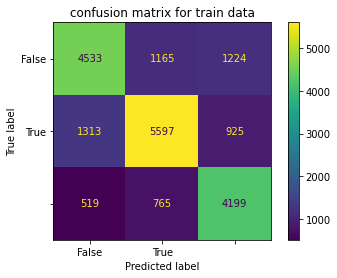

In [ ]:
acc_test = accuracy_score(targets_train,targets_predicted)
f1_test = f1_score(targets_train, targets_predicted, average="macro")
pre_test = precision_score(targets_train, targets_predicted, average="macro")
recall_test = recall_score(targets_train, targets_predicted, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(targets_train, targets_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for train data')

### Evaluatiing the Model on Test Data

In [ ]:
pt_model_trained.eval()
targets_train = []
targets_predicted = []
with torch.inference_mode():
  for dl in tqdm(test_data_loader, total=len(test_data_loader), desc="Validating... "):
  # 1. Forward pass
    input_ids = dl['input_ids']
    attention_mask = dl['attention_mask']
    token_type_ids = dl['token_type_ids']
    targets = dl['targets']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    targets = targets.to(device)
    outputs = pt_model_trained(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().detach().numpy()
    targets = targets.cpu().detach().numpy()
    targets_predicted.append(preds)
    targets_train.append(targets)



Validating... : 100%|██████████| 317/317 [00:39<00:00,  8.11it/s]


In [ ]:
#targets_train = np.concatenate(targets_train,axis = 0)
targets_predicted = np.concatenate(targets_predicted,axis = 0)
targets_train = np.concatenate(targets_train,axis = 0)

In [ ]:
print(np.shape(targets_predicted))
print(np.shape(targets_train))

(5067,)
(5067,)


accuracy score on test data: 0.5123347148213934
f1 score on test data: 0.5047362258777134
precision score on test data: 0.5091172776319263
recall score on test data: 0.5084298098887129


Text(0.5, 1.0, 'confusion matrix for test data')

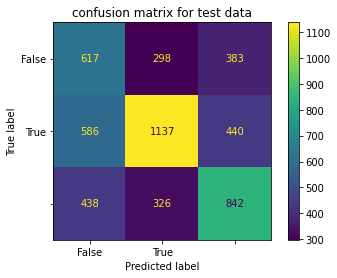

In [ ]:
acc_test = accuracy_score(targets_train,targets_predicted)
f1_test = f1_score(targets_train, targets_predicted, average="macro")
pre_test = precision_score(targets_train, targets_predicted, average="macro")
recall_test = recall_score(targets_train, targets_predicted, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(targets_train, targets_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for test data')

### Evaluating the Model on Valid Data

In [ ]:
pt_model_trained.eval()
targets_train = []
targets_predicted = []
with torch.inference_mode():
  for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
  # 1. Forward pass
    input_ids = dl['input_ids']
    attention_mask = dl['attention_mask']
    token_type_ids = dl['token_type_ids']
    targets = dl['targets']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    targets = targets.to(device)
    outputs = pt_model_trained(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().detach().numpy()
    targets = targets.cpu().detach().numpy()
    targets_predicted.append(preds)
    targets_train.append(targets)



Validating... : 100%|██████████| 317/317 [00:39<00:00,  8.07it/s]


In [ ]:
#targets_train = np.concatenate(targets_train,axis = 0)
targets_predicted = np.concatenate(targets_predicted,axis = 0)
targets_train = np.concatenate(targets_train,axis = 0)

In [ ]:
print(np.shape(targets_predicted))
print(np.shape(targets_train))

(5063,)
(5063,)


accuracy score on val data: 0.5234050957930081
f1 score on val data: 0.5220989725981453
precision score on val data: 0.5216803796866721
recall score on val data: 0.5233160107740867


Text(0.5, 1.0, 'confusion matrix for val data')

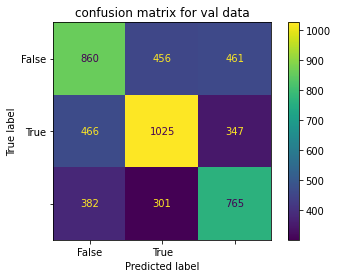

In [ ]:
acc_test = accuracy_score(targets_train,targets_predicted)
f1_test = f1_score(targets_train, targets_predicted, average="macro")
pre_test = precision_score(targets_train, targets_predicted, average="macro")
recall_test = recall_score(targets_train, targets_predicted, average="macro")
print(f"accuracy score on val data: {acc_test}")
print(f"f1 score on val data: {f1_test}")
print(f"precision score on val data: {pre_test}")
print(f"recall score on val data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(targets_train, targets_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for val data')

#Training More Epochs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pt_model = Sentiment_Bert_classifier(config=config,MODEL_NAME_OR_PATH = 'distilbert-base-uncased',fine_tune = True )
pt_model = pt_model.to(device)

pt_model.load_state_dict(torch.load("/content/drive/MyDrive/pt_model_trained_with_normal_text.pth"))

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertModel: ['vocab_transform.bias', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'vocab_layer_norm.weight', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.sa_layer_norm.weight', 'distilbert.transformer.layer.5.ffn.lin1.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.4.ffn.lin2.weight', 'distilbert.transformer.layer.5.attention.q_lin.weight', 'distilbert.transformer.layer.3.attention.out_lin.weight', 'distilbert.transformer.layer.3.ffn.lin1.bias', 'distilbert.transformer.layer.0.sa_layer_norm.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.1.output_layer_norm.bias', 'distilbert.transformer.layer.3.attention.q_lin.bias', 'vocab_layer_norm.bias', 'distilbert.transformer.layer.3.output_layer_norm.bias',

<All keys matched successfully>

In [ ]:
def train_model_manual(model, criterion, optimizer,scheduler,val_beark,clip, num_epochs=25):
  """
  function for train our model! in this function we use dataloader directly.
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
      clip: for gradient clipping
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for dl in tqdm(train_data_loader, total=len(train_data_loader), desc="Training... "):
      # 1. Forward pass
      input_ids = dl['input_ids']
      attention_mask = dl['attention_mask']
      token_type_ids = dl['token_type_ids']
      targets = dl['targets']
      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      token_type_ids = token_type_ids.to(device)
      targets = targets.to(device)
 
      outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, targets)
      acc_train += torch.sum(preds == targets.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()
      if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

      # 5. Optimizer step
      optimizer.step()
    loss_train = loss_train/counter
    acc_train = 100*acc_train/len(Dataset_Train)
    train_acc.append(acc_train)
    train_loss.append(loss_train)
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for dl in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)
        outputs = model(input_ids=input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids) # model outputs raw logits 
        _, preds = torch.max(outputs, 1)
        loss_test= criterion(outputs, targets.data)
        acc_test += torch.sum(preds == targets.data)
      loss_test = loss_test/counter
      acc_test = 100*acc_test/len(Dataset_Val)
      test_loss.append(loss_test)
      test_acc.append(acc_test)
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [ ]:
criterion = nn.CrossEntropyLoss()


optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

pt_model = pt_model.to(device)
pt_model_trained,best_loss,best_acc = train_model_manual(pt_model, criterion, optimizer_conv,exp_lr_scheduler,4,0.0,num_epochs=4)

Validating... : 100%|██████████| 317/317 [00:36<00:00,  8.72it/s]


Epoch: 0 | Loss: 0.77226, Acc: 66.25% | Test Loss: 1.31705, Test Acc: 50.39%


Validating... : 100%|██████████| 317/317 [00:36<00:00,  8.73it/s]


Epoch: 1 | Loss: 0.73420, Acc: 68.70% | Test Loss: 1.18240, Test Acc: 51.43%


Validating... : 100%|██████████| 317/317 [00:36<00:00,  8.72it/s]


Epoch: 2 | Loss: 0.69948, Acc: 70.37% | Test Loss: 1.62297, Test Acc: 52.18%


Validating... : 100%|██████████| 317/317 [00:36<00:00,  8.71it/s]


Epoch: 3 | Loss: 0.65965, Acc: 72.26% | Test Loss: 1.02862, Test Acc: 50.60%
Training complete in 28m 28s
Best val Acc: 52.182499


because of limitation due available ram on colan, we trained saved model seperatly for 4 more epoches but result didn't get better, so our validation accuracy can't get any better than %52

## Comparing results:

in previous part, we plotes confusion matrix and reported f1-score and accuracy seperatly, so here we just compare models.

it is important to note that with confusion matrix we can check that all models create all possible outputs( 0,1,2) so this accuracies are really have meaning (and model don't just predict label with most number of occurance), so we can eassily compare accracy and f1-score of models to each other to find best model.

first, using tf-idf we achive around 50 percent accracy (0.4973335966818092 on validation and 0.5101638050128281 on test) and 49 f1 score(0.48446573114662045 on validation and : 0.4910082155590583 on test data, we don't use accuracy on train data because we can easily overfit our model to train data and they don't provide any information how good our model is) so we can see 10 percent increase in our accuracy compared to phase 1. it showes that this simple transform can help models like svm to learn pattern of important words (like words that have  negative meanings) and based on them predict sentiment of sentences.
in word2vec like vectors, we achived near 49 percent accuracy (0.4765949042069919 on validation and  0.49457272547858694 on test) and 47 percent f1score (0.4683589865663042 on validation and 0.4758987712567499 on test) so we perform relativly good, main problem here is we needed to reduce dimension of our data, because for eavry word, we had a feature vector and it size is equal to number of sentences in train data, but it is also sparse, so when we used autoencoder netwrok to reduce dimension so we lose valuable information in order to have a more compact form, so it is expected to have a drop in performance, but because we use LSTM model that use both pattern of important words and structure of sentence (so it have a deeper undrestanding of sentence) we see that result stay relativly the same.
now our two final models, LSTM which it's embedding was GloVe50, and transformer, perform (nearly) the same. 
in LSTM case, using a better embedding(because of size of dataset it trained on and also it's logic to find weights) increase our accuracy, and our model performs best when we used preprocessed data (deleting stop words, Lemmatization of text ,...) it's because that when we use LSTM , model can learn structure of sentence and when it has negative or positive meaning based on position of words(relatively to each other), but beacuse don't have very big dataset stop words can have a negative effect on them so removing them boost our performance. in this case we achive 0.53 accuracy on both test and validation and 0.53 f1 score on validation and 0.52 on test data.
when we used transformers(distilbert) we see that when we use whole text (without removing stop words) we get better results it's becuse bert model are trained on a huge dataset without removing it stop words, so it learned distributon of words relative to each other when we have stop words. when using transformer we achive 0.5123347148213934 accuracy on validation data and 0.5234050957930081 on test data. also f1 score 0.5220989725981453 on test data and 0.5047362258777134 on validation data, so LSTM (using glove) and bert transformer performance are very close ( and because of randomness due to shuffling of train data when we train model,...) we can't compare this two models for now.
so if we want to rank models we have something like:

transformer(bert) = LSTM(glove) >tf-idf = LSTM(word2vec like)

so in the end, because we couldn't find best model with high confidence, in next phase we use both transformer ans lstm using glove to predict final label, we expect that the model which has higher level information stored in it's logits will perform better there so we can compare models more easily in next phase of project.